<a href="https://colab.research.google.com/github/HemangBajaj/Problem2/blob/main/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#Importing packages and libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Load data > $150k 

In [13]:
df = pd.read_csv("PPP_Data_150k_plus.csv")

In [14]:
df.head()

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,"d $350,000-1 million",AERO BOX LLC,NaN,NaN,NaN,NaN,484210.0,NaN,Unanswered,Unanswered,Unanswered,NaN,NaN,05/03/2020,The Huntington National Bank,NaN
1,"d $350,000-1 million",BOYER CHILDREN'S CLINIC,1850 BOYER AVE E,SEATTLE,NaN,98112.0,NaN,Non-Profit Organization,Unanswered,Unanswered,Unanswered,Y,75.0,05/03/2020,"Bank of America, National Association",WA-07
2,"d $350,000-1 million",KIRTLEY CONSTRUCTION INC,1661 MARTIN RANCH RD,SAN BERNARDINO,NaN,92407.0,236115.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,21.0,05/03/2020,"Bank of America, National Association",CA-31
3,"d $350,000-1 million","PLEASANT PLACES, INC.",7684 Southrail Road,North Charleston,NaN,29420.0,561730.0,Sole Proprietorship,Unanswered,Male Owned,Non-Veteran,NaN,73.0,05/03/2020,Synovus Bank,SC-01
4,"d $350,000-1 million","SUMTER COATINGS, INC.",2410 Highway 15 South,Sumter,NaN,29150.0,325510.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,62.0,05/03/2020,Synovus Bank,SC-05


# Load data < $150k (Florida)

In [11]:
fl = pd.read_csv("PPP_Data_upto_150k_Florida.csv")

In [12]:
fl.head()

,LoanAmount,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD
0,149999.00,TAMPA,FL,33612.0,624410.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,8.0,08/07/2020,"Kabbage, Inc.",FL-14
1,149997.00,Ruskin,FL,33570.0,812990.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,8.0,08/06/2020,Cross River Bank,FL-16
2,149995.22,PANAMA CITY,FL,32401.0,238220.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,22.0,04/15/2020,Trustmark National Bank,FL-02
3,149995.00,St. Cloud,FL,34771.0,812990.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,7.0,08/06/2020,Cross River Bank,FL-09
4,149994.00,SARASOTA,FL,34236.0,611699.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,50.0,05/03/2020,"Bank of America, National Association",FL-16


In [15]:
df.LoanRange.unique()

array(['d $350,000-1 million', 'e $150,000-350,000', 'a $5-10 million',
       'b $2-5 million', 'c $1-2 million'], dtype=object)

In [16]:
loan = {
    "a $5-10 million": {"lower": 5000000, "upper": 10000000},
    "b $2-5 million": {"lower": 2000000, "upper": 4999999},
    "c $1-2 million": {"lower": 1000000, "upper":1999999},
    "d $350,000-1 million": {"lower": 350000, "upper":999999},
    "e $150,000-350,000" : {"lower": 150000, "upper":349999}
}

In [17]:
df['loan_lower'] = df.LoanRange.apply(lambda x: loan[x]["lower"])
df['loan_upper'] = df.LoanRange.apply(lambda x: loan[x]["upper"])

In [18]:
df["date_approved_dt"] = pd.to_datetime(df["DateApproved"]).values

# Amount of loans over time

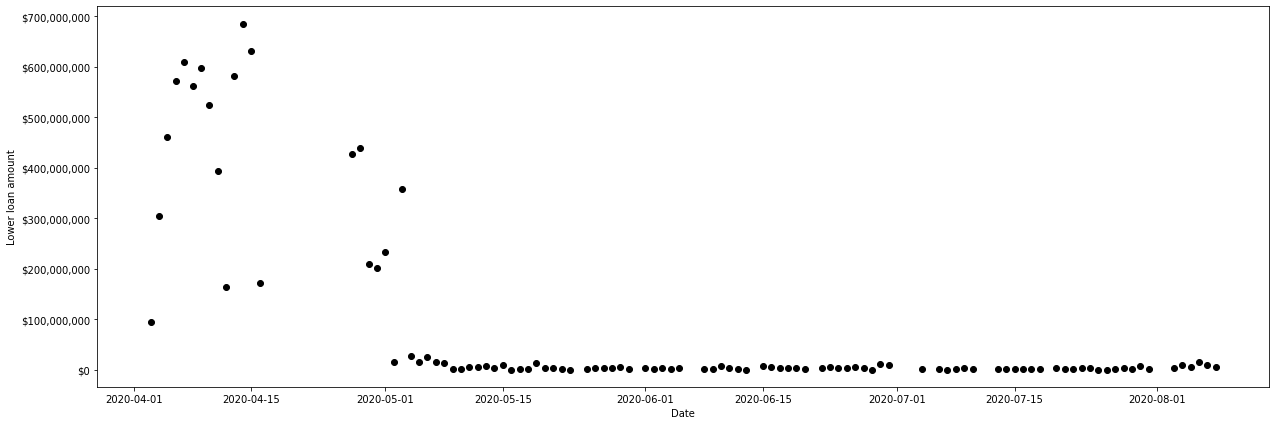

In [19]:
fig, ax = plt.subplots(figsize=(21, 7))

x = df.groupby("date_approved_dt")["loan_lower"].sum().index.values
y = df.groupby("date_approved_dt")["loan_lower"].sum().values

yy = pd.DataFrame({"date":x, "csum": y}).set_index("date").cumsum().values
ax.scatter(x, y, color="k")

kwd = {
    "xlabel": "Date",
    "ylabel": "Lower loan amount"
}
ax.set(**kwd)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

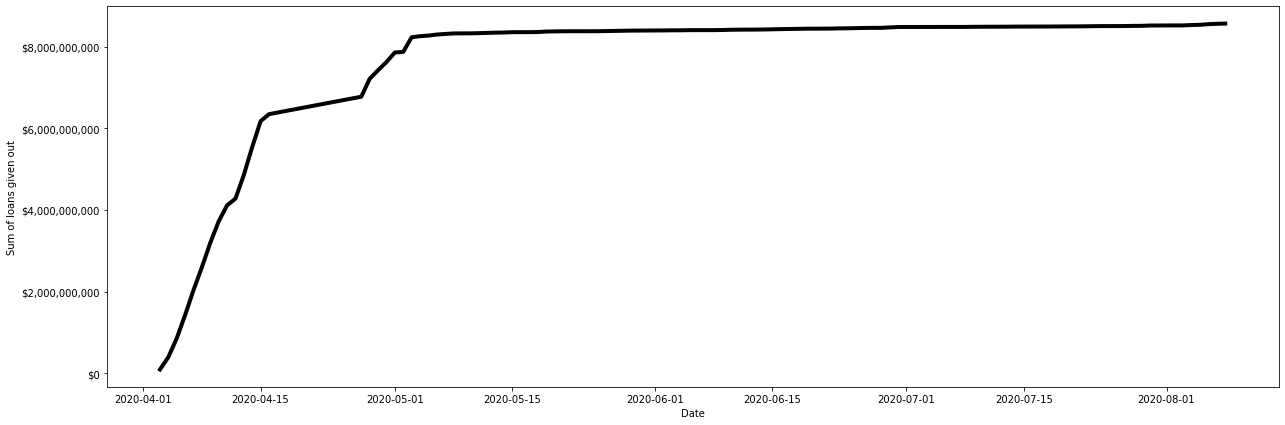

In [20]:
fig, ax = plt.subplots(figsize=(21, 7))

x = df.groupby("date_approved_dt")["loan_lower"].sum().index.values
y = df.groupby("date_approved_dt")["loan_lower"].sum().values

yy = pd.DataFrame({"date":x, "csum": y}).set_index("date").cumsum().values

ax.plot(x, yy, linewidth=4, color="k")

kwd = {
    "xlabel": "Date",
    "ylabel": "Sum of loans given out"
}
ax.set(**kwd)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('${x:,.0f}'))

plt.show()

# Number of loans per state

In [21]:
pd.DataFrame(df[df.BusinessType.notna()]["BusinessType"].value_counts())

,BusinessType
Corporation,8613
Limited Liability Company(LLC),6573
Subchapter S Corporation,4000
Non-Profit Organization,1364
Sole Proprietorship,352
Partnership,243
Professional Association,166
Limited Liability Partnership,159
Cooperative,56
Self-Employed Individuals,21


In [22]:
pd.DataFrame(df[df.State.notna()]["State"].value_counts())

,State
AL,7867
AZ,7754
AR,4273
AK,1713
AS,20


INSIGHTS :

In [26]:
print(f'There are {df.JobsReported.isna().sum():,.0f} out of {df.shape[0]:,.0f} companies that did not report the number of jobs retained')
print(f"There are {(df.JobsReported==0).sum():,.0f} out of {df.shape[0]:,.0f} companies that reported 0 number of jobs retained")

There are 1,267 out of 21,643 companies that did not report the number of jobs retained
There are 1,164 out of 21,643 companies that reported 0 number of jobs retained


# Many business reported retaining zero jobs even with PPP

In [27]:
df.iloc[np.where(df.JobsReported.values == 0.0)[0]]

,LoanRange,BusinessName,Address,City,State,Zip,NAICSCode,BusinessType,RaceEthnicity,Gender,Veteran,NonProfit,JobsReported,DateApproved,Lender,CD,loan_lower,loan_upper,date_approved_dt
22,a $5-10 million,KATMAI HEALTH SERVICES LLC,"11001 O'MALLEY CENTRE DRIVE, SUITE 204",Anchorage,AK,99515.0,621111.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/29/2020,Truist Bank d/b/a Branch Banking & Trust Co,AK-00,5000000,10000000,2020-04-29
27,a $5-10 million,"TYONEK GLOBAL SERVICES, LLC",1689 C ST,ANCHORAGE,AK,99501.0,611420.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/30/2020,BBVA USA,AK-00,5000000,10000000,2020-04-30
28,a $5-10 million,"TYONEK WORLDWIDE SERVICES, INC.",1689 C ST,ANCHORAGE,AK,99501.0,488190.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,04/30/2020,BBVA USA,AK-00,5000000,10000000,2020-04-30
38,b $2-5 million,ALASKA VILLAGE ELECTRIC,4831 EAGLE STREET,ANCHORAGE,AK,99503.0,221122.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,05/06/2020,"Wells Fargo Bank, National Association",AK-00,2000000,4999999,2020-05-06
81,b $2-5 million,"TYONEK MANUFACTURING GROUP, INC.",1689 C ST,ANCHORAGE,AK,99501.0,551112.0,Subchapter S Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,04/30/2020,BBVA USA,AK-00,2000000,4999999,2020-04-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21569,"e $150,000-350,000","INTER-CO RESTROOM & LOCKER SUPPLY, INC.",2224 E Jones Ave,Phoenix,AZ,85040.0,238390.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,04/28/2020,FirstBank,AZ-07,150000,349999,2020-04-28
21582,"e $150,000-350,000",INTERNATIONAL RESTAURANTS II LLC,2720 N Oracle Road,Tucson,AZ,85705.0,722511.0,Limited Liability Company(LLC),Unanswered,Male Owned,Unanswered,NaN,0.0,05/02/2020,CDC Small Business Finance Corporation,AZ-03,150000,349999,2020-05-02
21597,"e $150,000-350,000",IRONWOOD WEALTH MANAGEMENT LLC,4650 E Cotton Center Blvd Suite 13,PHOENIX,AZ,85040.0,523930.0,Limited Liability Company(LLC),Unanswered,Unanswered,Unanswered,NaN,0.0,04/03/2020,First State Bank Nebraska,AZ-07,150000,349999,2020-04-03
21623,"e $150,000-350,000",J&M GLASS LLC,2025 W DEER VALLEY RD SUITE 105,PHOENIX,AZ,85027.0,238150.0,Corporation,Unanswered,Unanswered,Unanswered,NaN,0.0,05/07/2020,"Wells Fargo Bank, National Association",AZ-06,150000,349999,2020-05-07


# These are the companies that reported 0 number of jobs retained

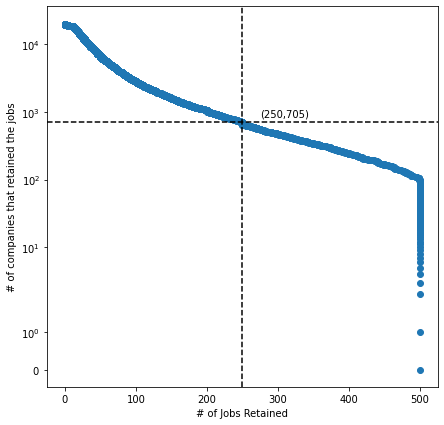

In [30]:
fig, ax = plt.subplots(figsize=(7,7))

m = df.JobsReported.isna()
njobs = 250
xeps=0.1
yeps=0.2

x = np.sort(df.JobsReported.values[~m])[::-1]
y = np.arange(len(x))

xl = njobs
yl = y[np.where(x<njobs)[0][0]]

ax.axvline(x=xl, color="k", linestyle="--")
ax.axhline(y=yl, color="k", linestyle="--")

ax.annotate(f"({xl:,.0f},{yl:,.0f})", (xl*(1+xeps), yl*(1+yeps)))

ax.scatter(x, y)


kwd = {"yscale": "symlog",
       "xlabel" : "# of Jobs Retained",
       "ylabel" : "# of companies that retained the jobs"}
ax.set(**kwd)

plt.show()

# It appears that the maximum amount of jobs a business can retain is 500

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


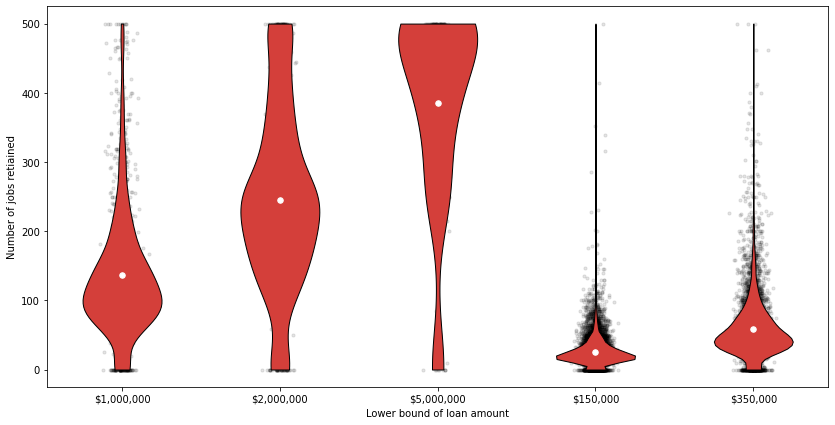

In [32]:
fig, ax = plt.subplots(figsize=(14,7))

alpha=0.1
lower = df.loan_lower.unique()[::-1]

labels = [f"${n:,.0f}" for n in lower]
lidx = np.arange(len(labels)) + 1


x = []
for l in lower:
  x.append(df.query(f"loan_lower == {l}")[df.query(f"loan_lower == {l}")["JobsReported"].notna()]["JobsReported"].values)

parts = ax.violinplot(x, showmedians=False, showextrema=False)
for pcidx, pc in enumerate(parts['bodies']):
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(1)

    
mean = [np.mean(i) for i in x]
ax.scatter(lidx, mean, marker='o', color='white', s=30, zorder=3)

######## Add some random "jitter" to the x-axis
xx = [lval + np.random.normal(1, 0.04, size=len(d))-1 for d, lval in zip(x, lidx)]

for vals, xvals in zip(xx, x):
  ax.scatter(vals, xvals, alpha=alpha, s=10, zorder=-1, color="k")

ax.set_xticks(lidx)
ax.set_xticklabels(labels)
ax.set_xlabel("Lower bound of loan amount")
ax.set_ylabel("Number of jobs retiained")


plt.show()

#  Loan amount correlation with jobs reported